In [1]:
source('helpers.R')
source('../utils.R')

In [4]:
loadLibraries()
x = loadData()

In [3]:
df.combined =  x$combined %>% 
    mutate(MSSubClass = as.character(MSSubClass), 
           YearBuiltChar = as.character(YearBuilt),
           LotAreaSqrt = sqrt(LotArea),
           LotAreaLog = log(LotFrontage)
    )

df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.cutted = df.lot_frontage %>% filter(LotFrontage < 130)

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)

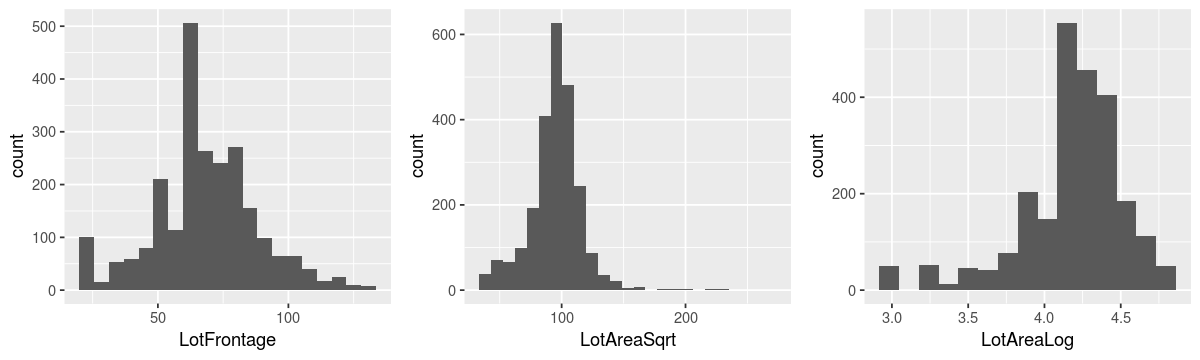

In [6]:
options(repr.plot.width = 10, repr.plot.height = 3)

g1 = ggplot(df.lot_frontage.cutted, aes(x = LotFrontage)) + geom_histogram(bins = 20)
g2 = ggplot(df.lot_frontage.cutted, aes(x = LotAreaSqrt)) + geom_histogram(bins = 25)
g3 = ggplot(df.lot_frontage.cutted, aes(x = LotAreaLog)) + geom_histogram(bins = 15)

grid.arrange(g1, g2, g3, layout_matrix=rbind(c(1, 2, 3)))

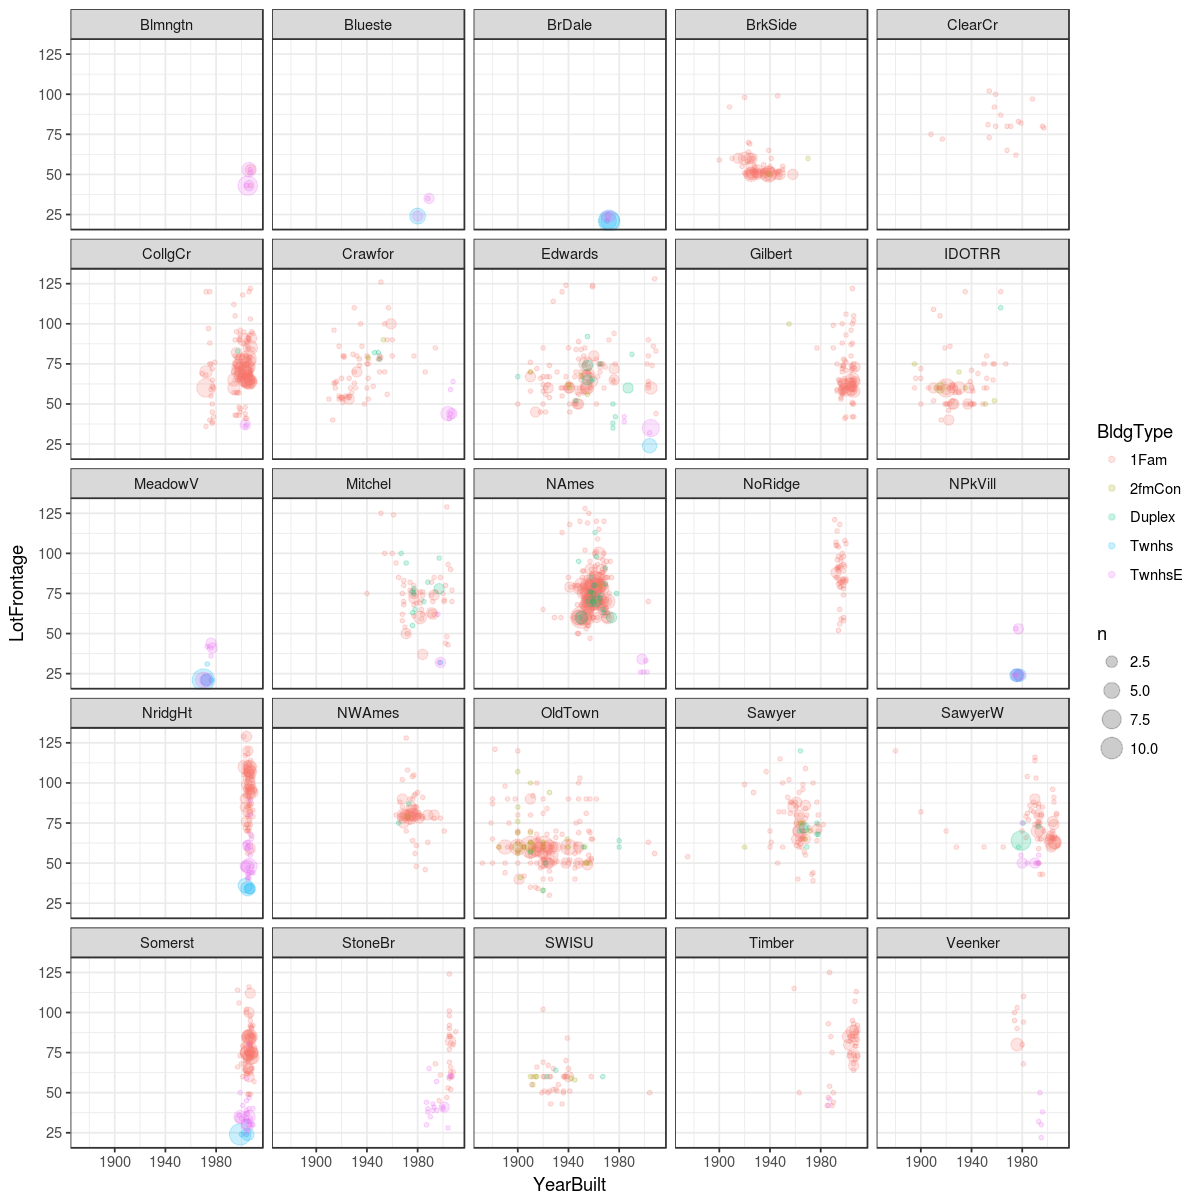

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df.lot_frontage.cutted, aes(x=YearBuilt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.2) +
    facet_wrap(~Neighborhood) +
    theme_bw()

# Blmngtn

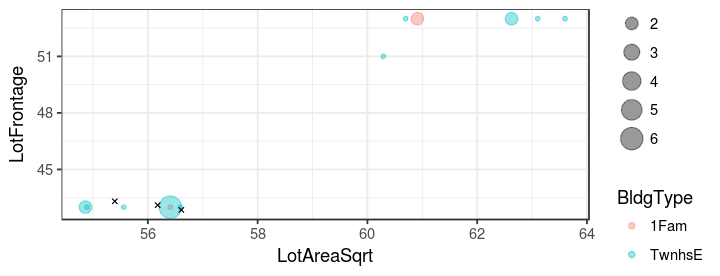

In [5]:
options(repr.plot.width = 6, repr.plot.height = 2.3)

source("lot_frontage_fix_na.R")

x = FixNaLotFrontage.Blmngtn(df.train)

ggplot() +
    geom_count(data=df.lot_frontage %>% filter(Neighborhood == 'Blmngtn'), 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_jitter(data=x %>% filter(Neighborhood == 'Blmngtn') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

# Blueste

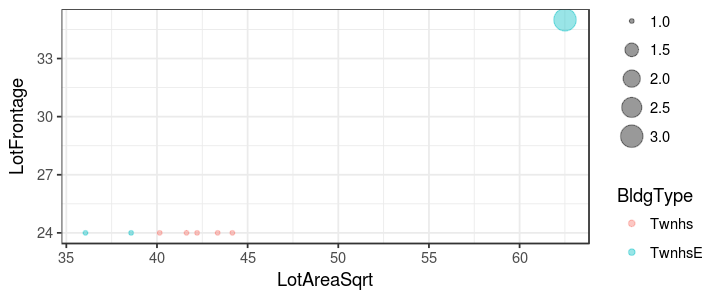

In [24]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Blueste'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

In [39]:
df.lot_frontage.na %>% 
    filter(Neighborhood == 'Blueste') %>%
    select(LotAreaSqrt, BldgType)

LotAreaSqrt,BldgType


# BrDale

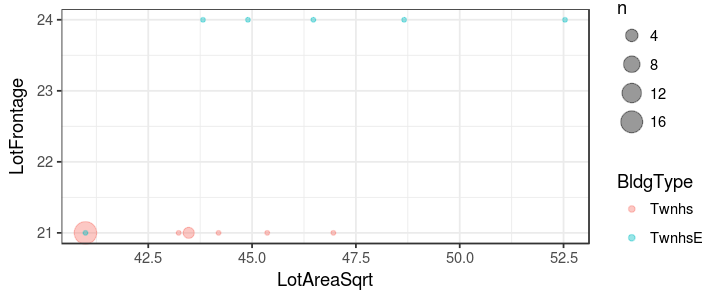

In [28]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'BrDale'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

In [29]:
df.lot_frontage.na %>% 
    filter(Neighborhood == 'BrDale') %>%
    select(LotAreaSqrt, BldgType)

LotAreaSqrt,BldgType


# BrkSide

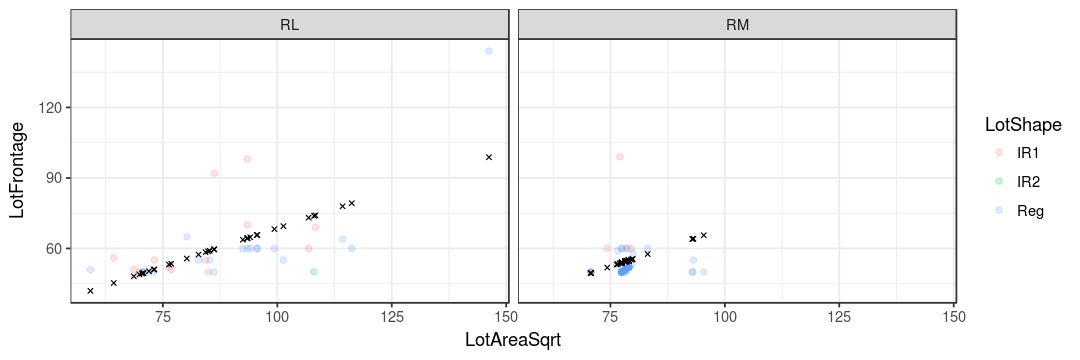

In [40]:
options(repr.plot.width = 9, repr.plot.height = 3)

df.BrkSide = df.lot_frontage %>% filter(Neighborhood == 'BrkSide')
lm.BrkSide.RL = lm(LotFrontage ~ LotAreaSqrt, data = df.BrkSide %>% filter(MSZoning == "RL"))
df.BrkSide = df.BrkSide %>% mutate(LotFrontageCalc=predict(lm.BrkSide.RL, df.BrkSide))

ggplot() +
    geom_point(data=df.BrkSide, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour = LotShape), 
               alpha=0.2) +
    geom_point(data=df.BrkSide,
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    facet_wrap(~MSZoning) +
    theme_bw()

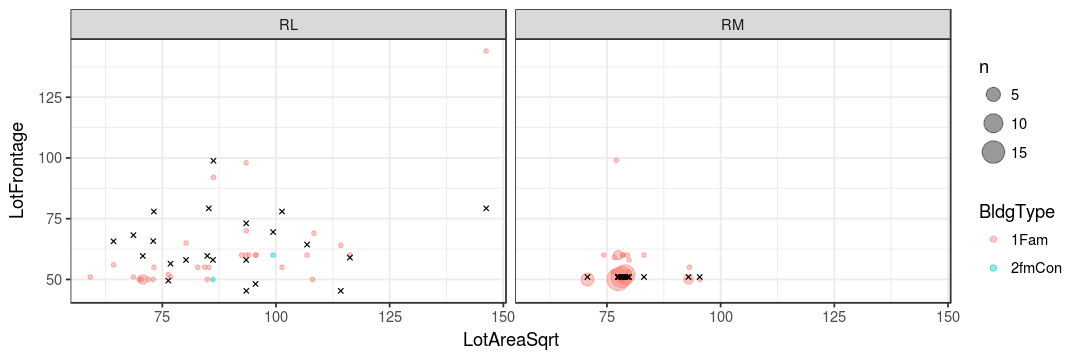

In [28]:
source("lot_frontage_fix_na.R")

x = FixNaLotFrontage.BrkSide(
        df.train = df.train, 
        df.data.BrkSide = df.BrkSide
    )

ggplot() +
    geom_count(data=df.BrkSide, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=x %>% filter(Neighborhood == 'BrkSide') %>% filter(!is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~MSZoning) +
     theme_bw()

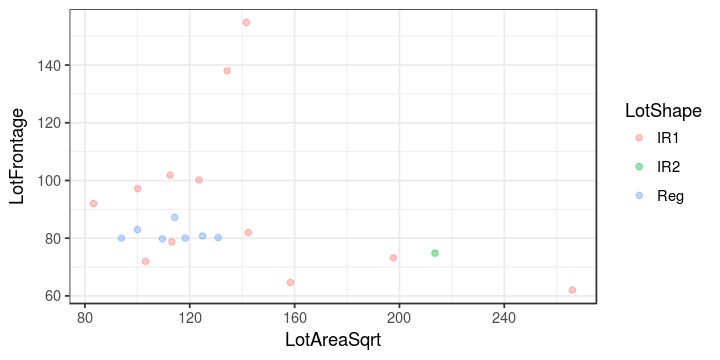

In [47]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'ClearCr'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.4, width=0) +
    theme_bw()

In [40]:
df.lot_frontage.na %>% 
    filter(Neighborhood == 'BrkSide') %>%
    select(LotAreaSqrt, BldgType)

LotAreaSqrt,BldgType
78.99367,1Fam
109.03211,1Fam
95.62426,1Fam
86.29021,1Fam
83.75560,1Fam
81.40639,1Fam
94.09570,1Fam
88.27797,1Fam
81.33265,1Fam
86.16844,1Fam


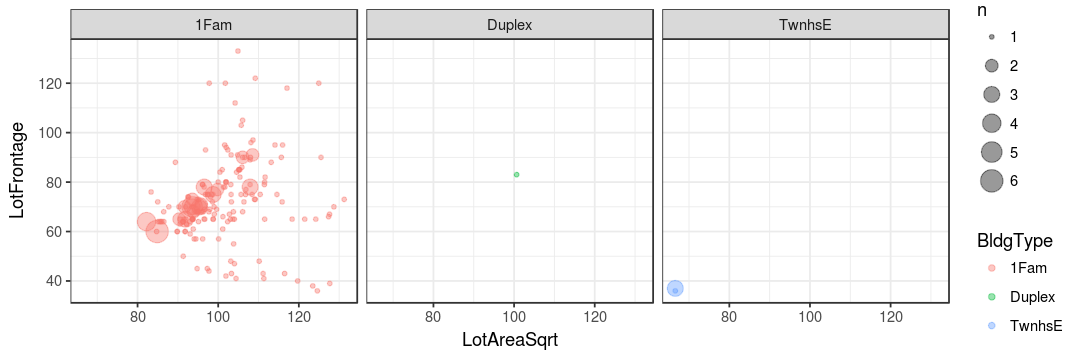

In [42]:
options(repr.plot.width = 9, repr.plot.height = 3)

dfCollgCr = df.lot_frontage %>% filter(Neighborhood == 'CollgCr')

ggplot(dfCollgCr, aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    facet_wrap(~BldgType) +
    theme_bw()

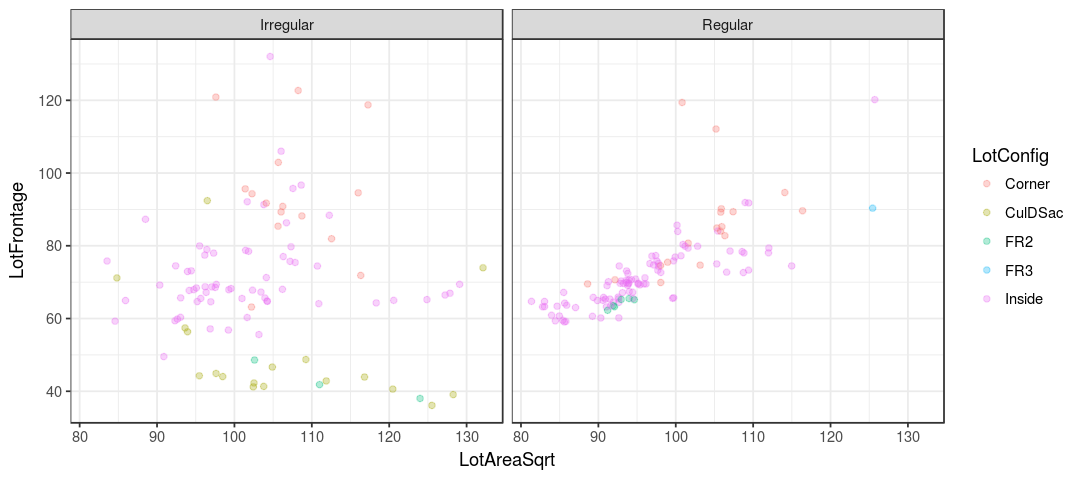

In [44]:
options(repr.plot.width = 9, repr.plot.height = 4)

df = 
    dfCollgCr %>% 
    filter(BldgType == '1Fam') %>%
    mutate(LotShape2 = ifelse(LotShape %in% c('IR1', 'IR2', 'IR3'), 'Irregular', 'Regular'))

ggplot(df, aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotConfig), alpha=0.3, width=1, height=1) +
    facet_wrap(~LotShape2) +
    theme_bw()

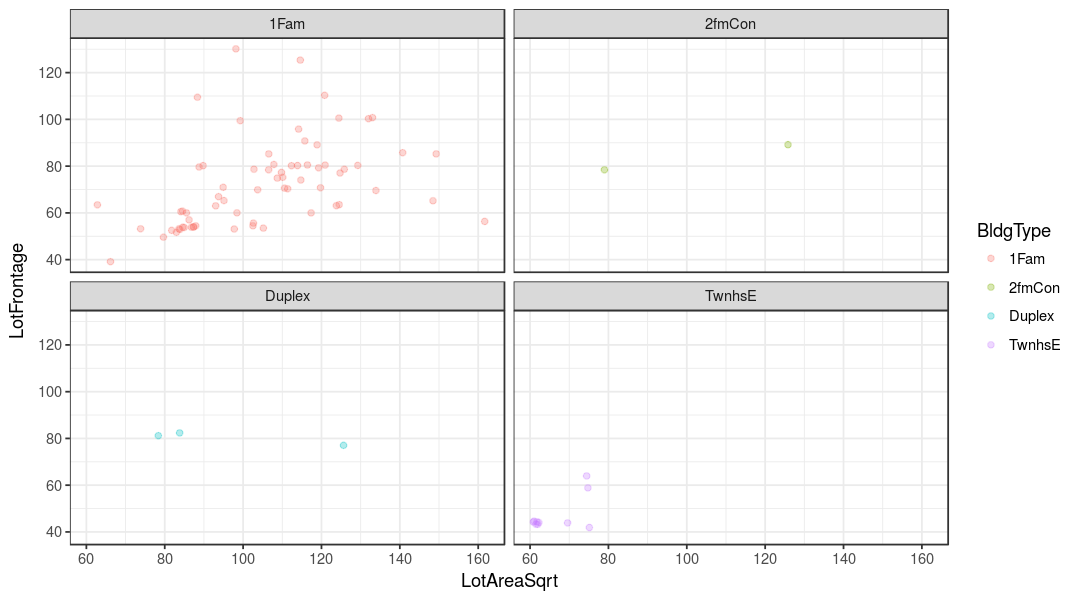

In [239]:
options(repr.plot.width = 9, repr.plot.height = 5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Crawfor'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

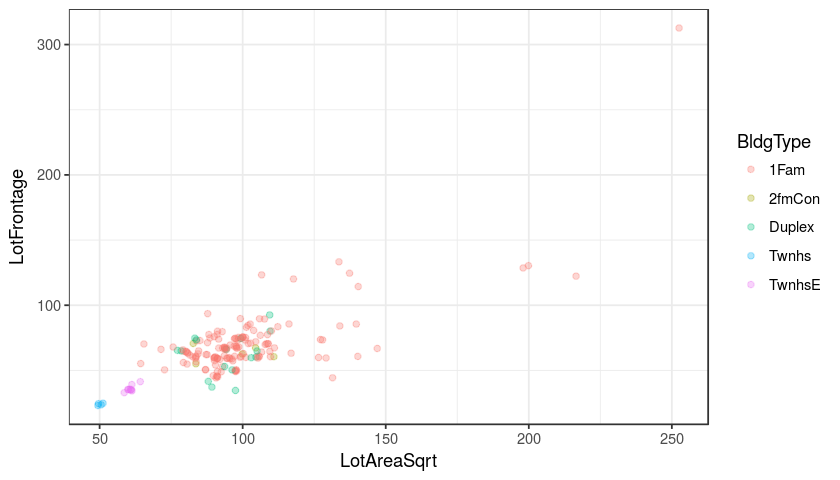

In [244]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Edwards'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

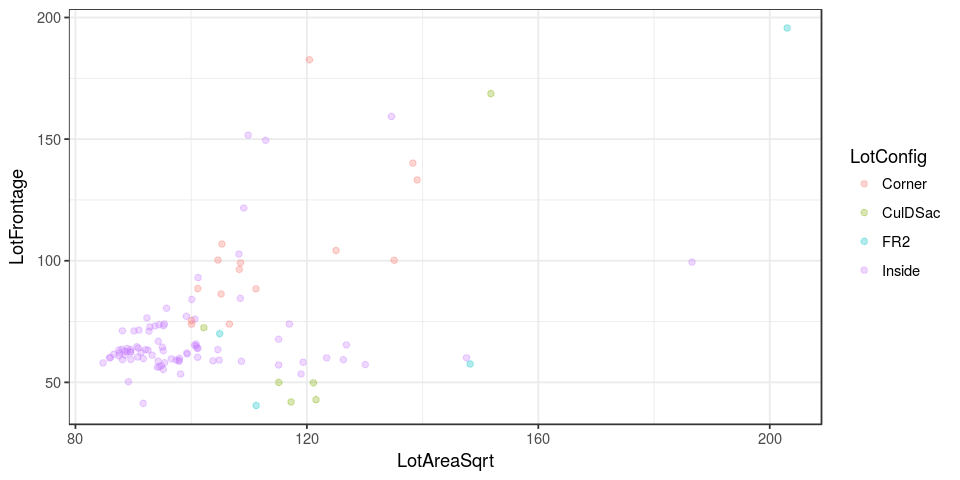

In [249]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Gilbert'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotConfig), alpha=0.3, width=1, height=1) +
    theme_bw()

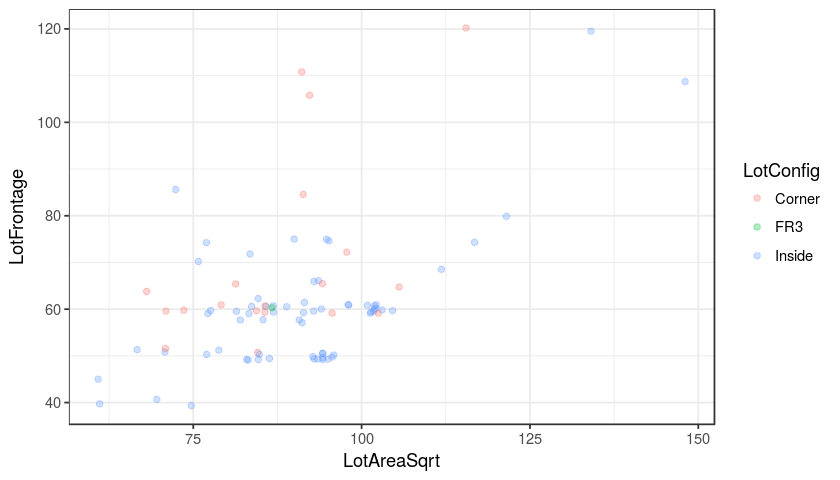

In [252]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'IDOTRR'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotConfig), alpha=0.3, width=1, height=1) +
    theme_bw()

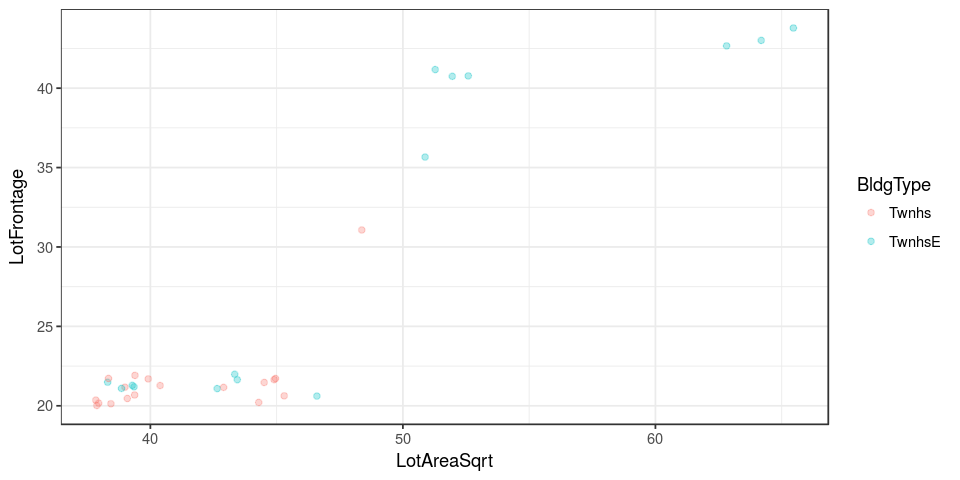

In [261]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'MeadowV'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

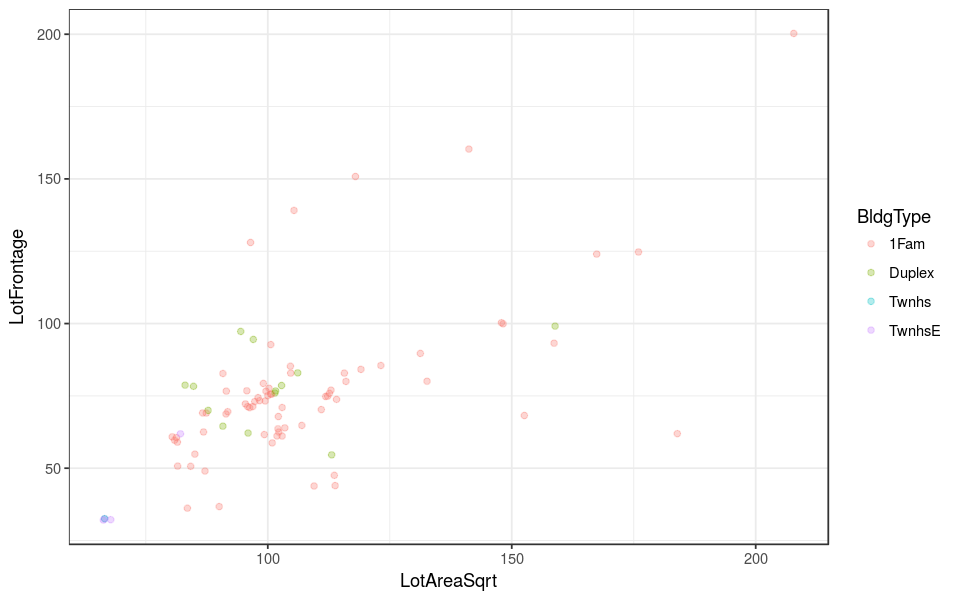

In [262]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Mitchel'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

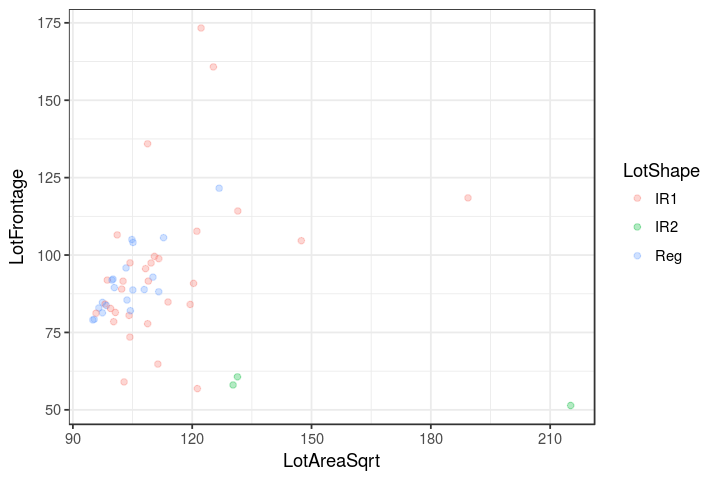

In [265]:
options(repr.plot.width = 6, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NoRidge'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.3, width=1, height=1) +
    theme_bw()

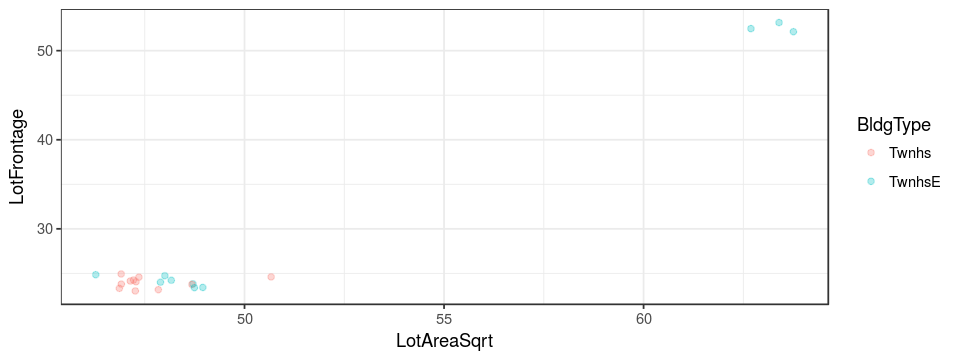

In [269]:
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NPkVill'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

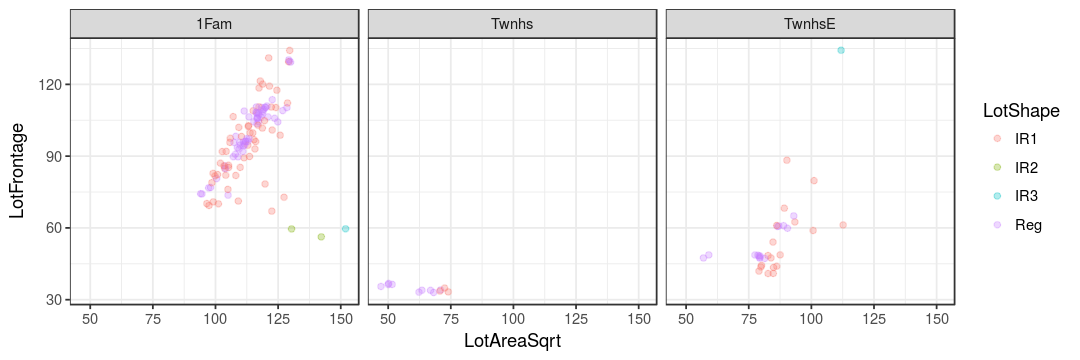

In [274]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NridgHt'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

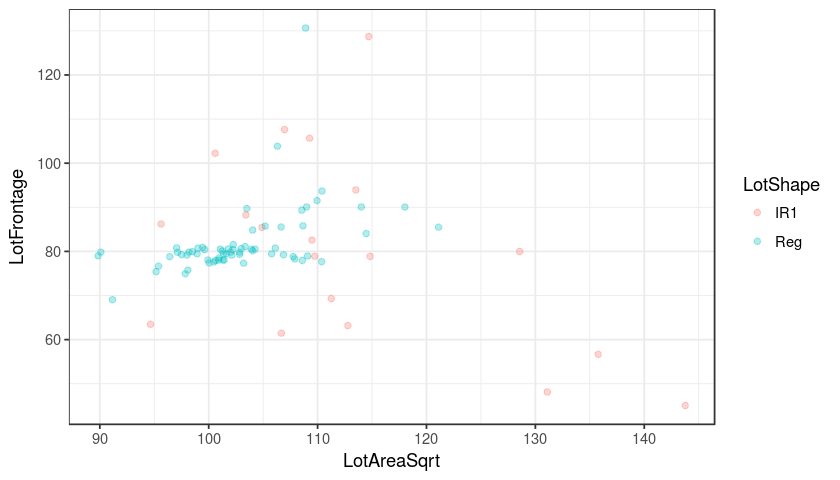

In [276]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NWAmes'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape), alpha=0.3, width=1, height=1) +
    theme_bw()

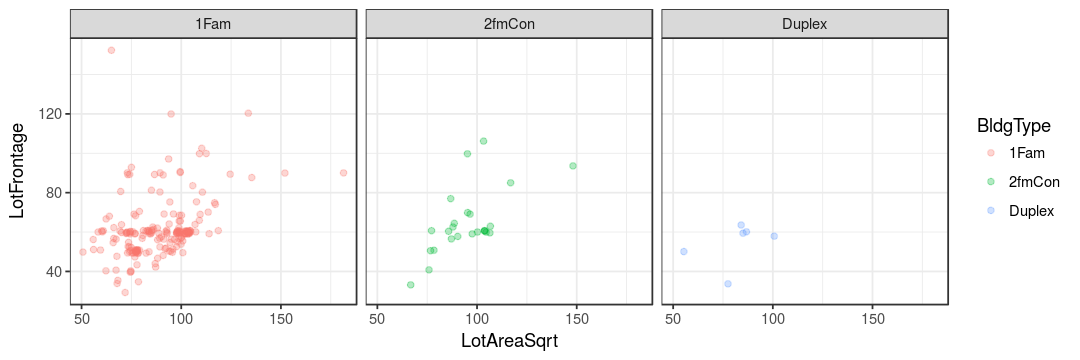

In [279]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'OldTown'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

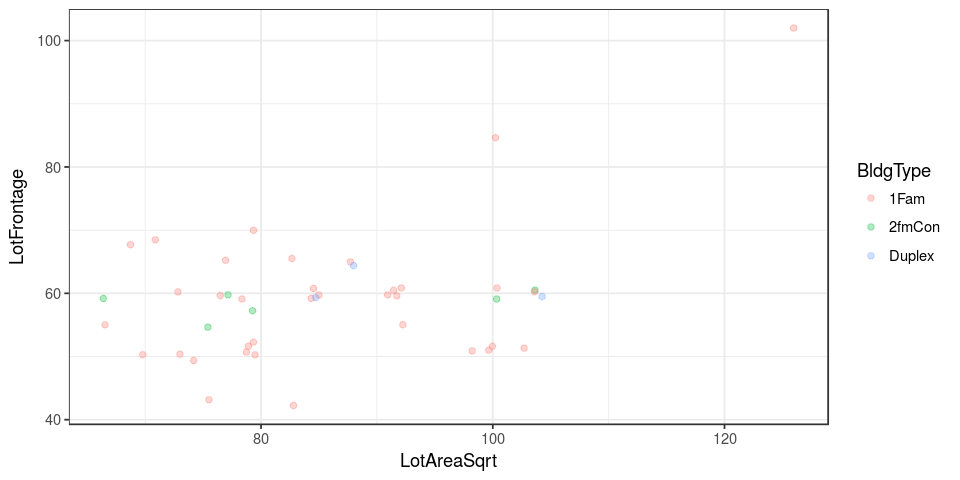

In [287]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SWISU'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

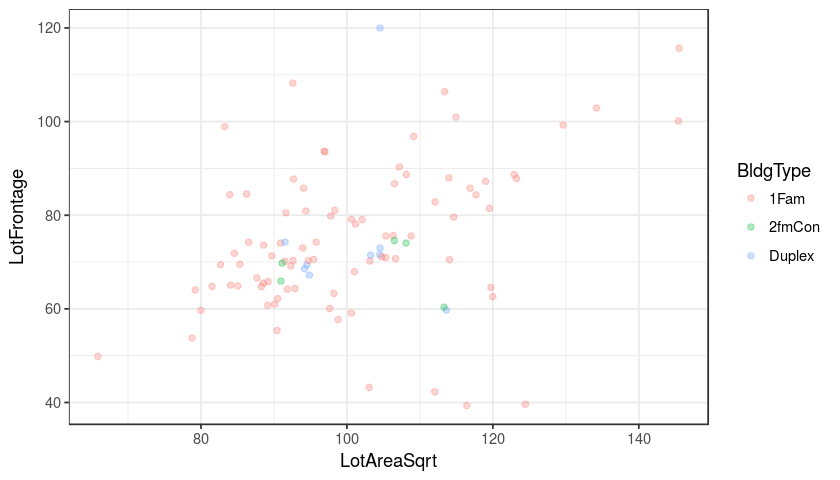

In [289]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Sawyer'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

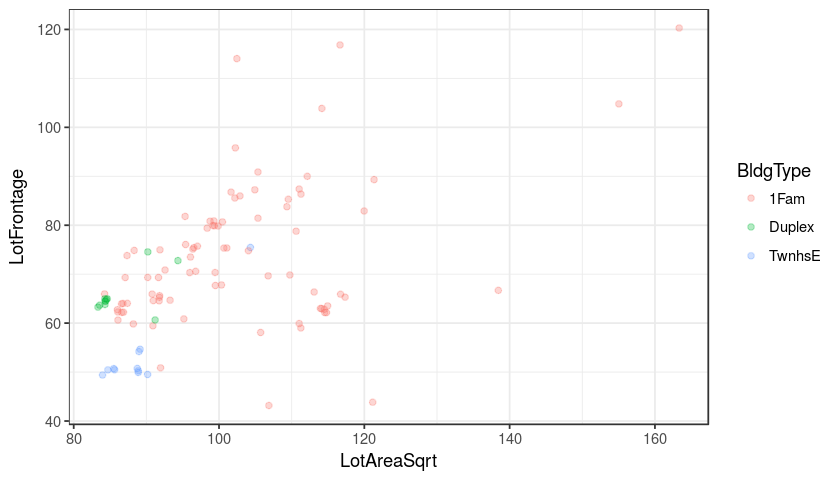

In [304]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SawyerW'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

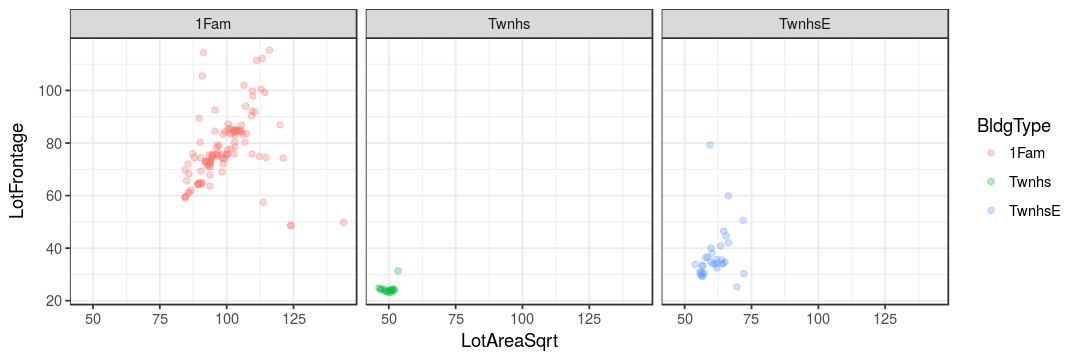

In [301]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Somerst'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    facet_wrap(~BldgType) +
    theme_bw()

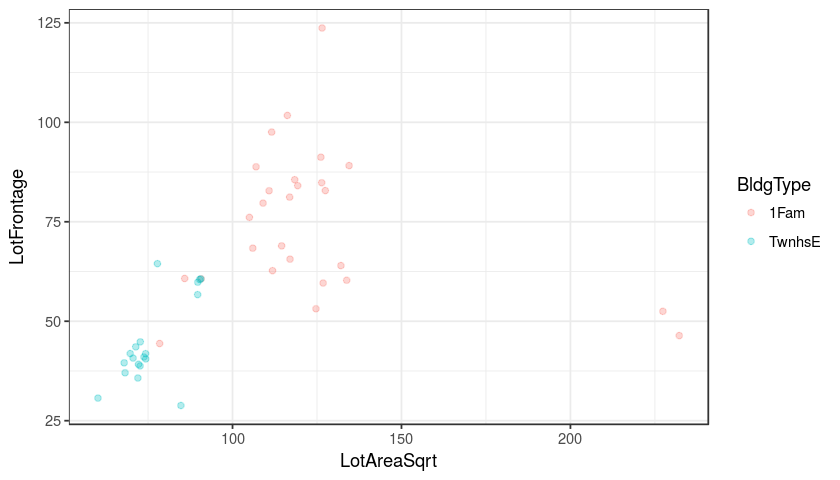

In [300]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'StoneBr'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

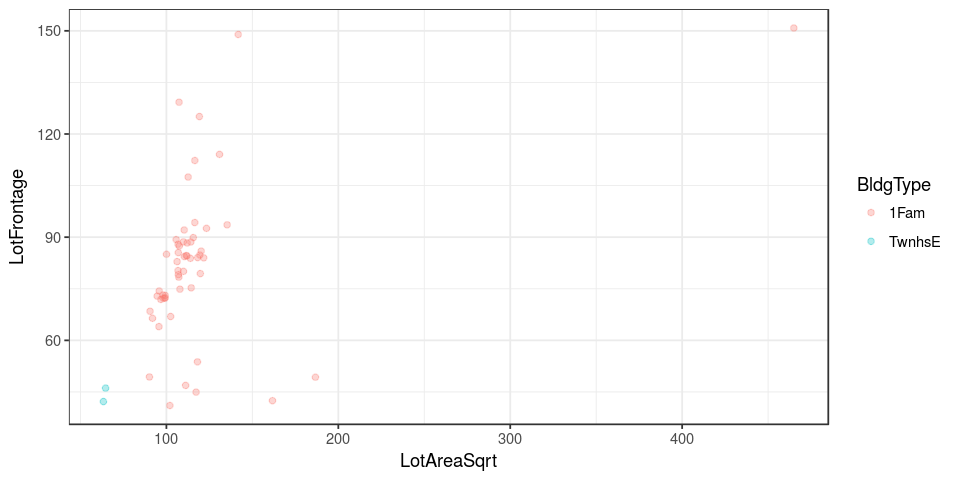

In [297]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Timber'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

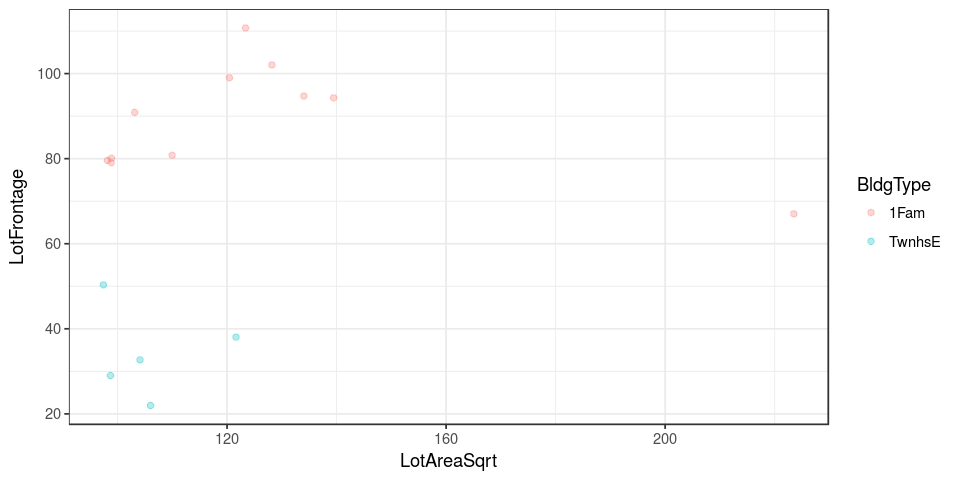

In [293]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Veenker'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()